<a href="https://colab.research.google.com/github/kyawminht/BDSE_-API-KyawMinHtwe-sourcecode/blob/main/renewable_energy_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving powerplants (global) - global_power_plants.csv to powerplants (global) - global_power_plants.csv


In [13]:
# Install required packages
!pip install geopandas plotly_express cartopy

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data (after uploading to Colab)
from google.colab import files
uploaded = files.upload()

# Read the dataset with correct column names
df = pd.read_csv('powerplants (global) - global_power_plants.csv')

# Verify the data
print("Dataset loaded with shape:", df.shape)
df.head()

Saving powerplants (global) - global_power_plants.csv to powerplants (global) - global_power_plants (1).csv
Dataset loaded with shape: (34936, 16)


,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


In [14]:
# Define renewable sources
renewable_sources = ['Hydro', 'Solar', 'Wind', 'Biomass', 'Geothermal',
                    'Wave and Tidal', 'Storage', 'Cogeneration']

# Filter renewable plants
df_re = df[df['primary_fuel'].isin(renewable_sources)].copy()

# Show renewable plants
print(f"Found {len(df_re)} renewable plants out of {len(df)} total plants")
df_re.head()

Found 24970 renewable plants out of 34936 total plants


,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


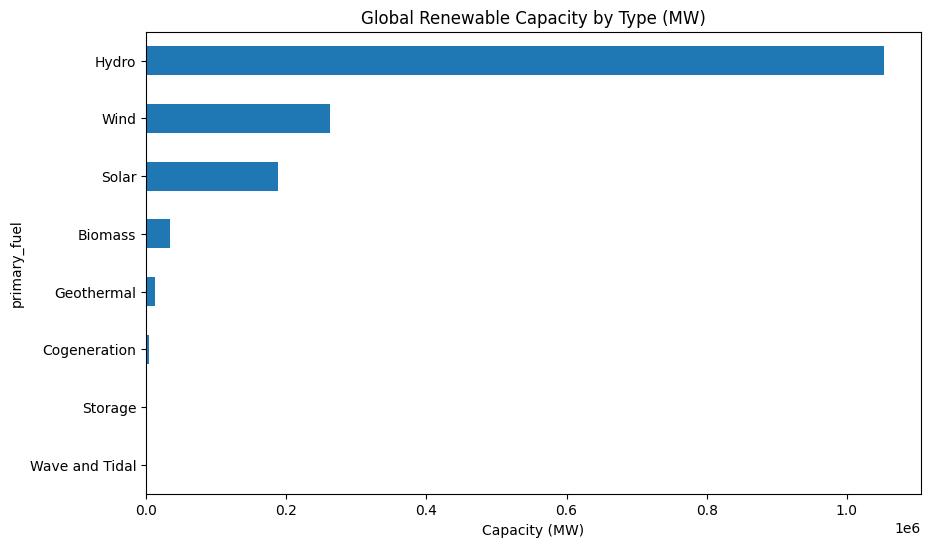

In [15]:
# Renewable capacity by country
df1 = pd.DataFrame(df_re.groupby('country code')['capacity in MW'].sum())
fig = px.choropleth(df1,
                   locations=df1.index,
                   color='capacity in MW',
                   scope='world',
                   color_continuous_scale=px.colors.sequential.GnBu,
                   range_color=(0, 400000),
                   title='World Renewable Energy Capacity (MW)',
                   height=500)
fig.show()

# Capacity by fuel type
plt.figure(figsize=(10,6))
df_re.groupby('primary_fuel')['capacity in MW'].sum().sort_values().plot.barh()
plt.title('Global Renewable Capacity by Type (MW)')
plt.xlabel('Capacity (MW)')
plt.show()

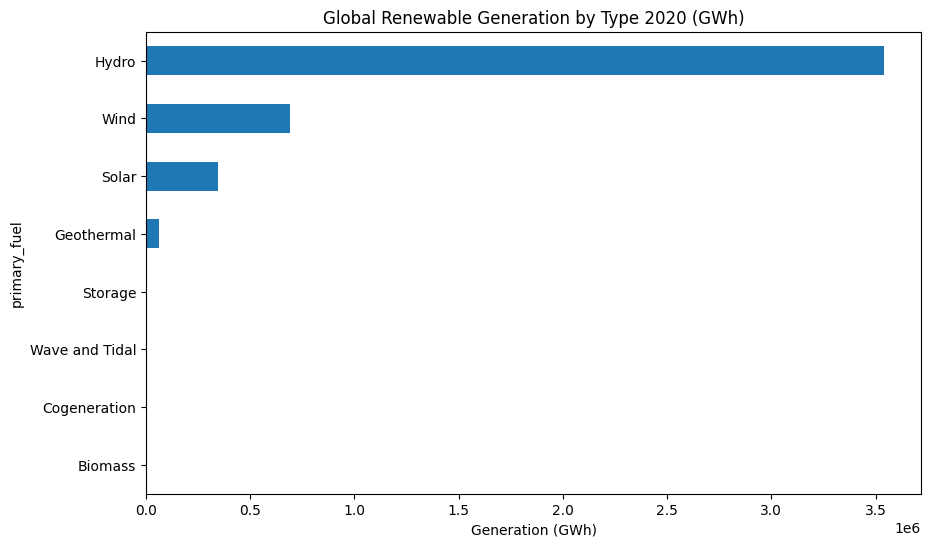

In [16]:
# Renewable generation by country
df2 = pd.DataFrame(df_re.groupby('country code')['estimated_generation_gwh_2020'].sum())
fig = px.choropleth(df2,
                   locations=df2.index,
                   color='estimated_generation_gwh_2020',
                   scope='world',
                   color_continuous_scale=px.colors.sequential.GnBu,
                   range_color=(0, 1100000),
                   title='World Renewable Energy Generation 2020 (GWh)',
                   height=500)
fig.show()

# Generation by fuel type
plt.figure(figsize=(10,6))
df_re.groupby('primary_fuel')['estimated_generation_gwh_2020'].sum().sort_values().plot.barh()
plt.title('Global Renewable Generation by Type 2020 (GWh)')
plt.xlabel('Generation (GWh)')
plt.show()

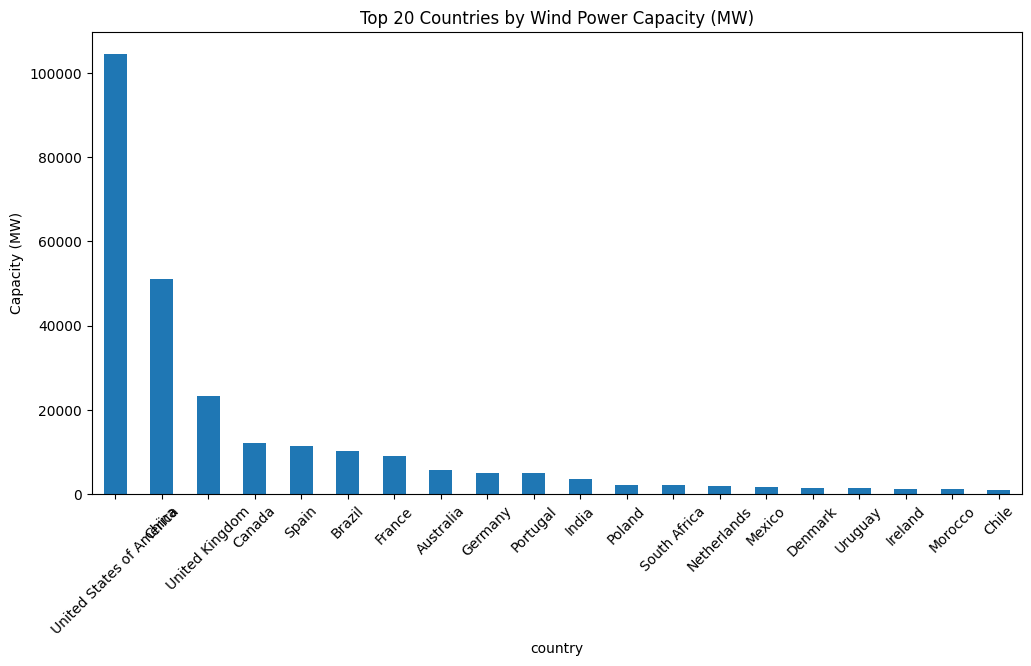

In [17]:
# Wind plants analysis
df_re_wind = df_re[df_re['primary_fuel'] == 'Wind']

# Map of wind plants
fig = px.scatter_geo(df_re_wind,
                    lat='latitude',
                    lon='longitude',
                    hover_name='name of powerplant',
                    size='capacity in MW',
                    title='Global Wind Power Plants (Size = Capacity)')
fig.show()

# Top countries by wind capacity
plt.figure(figsize=(12,6))
df_re_wind.groupby('country')['capacity in MW'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.title('Top 20 Countries by Wind Power Capacity (MW)')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)
plt.show()

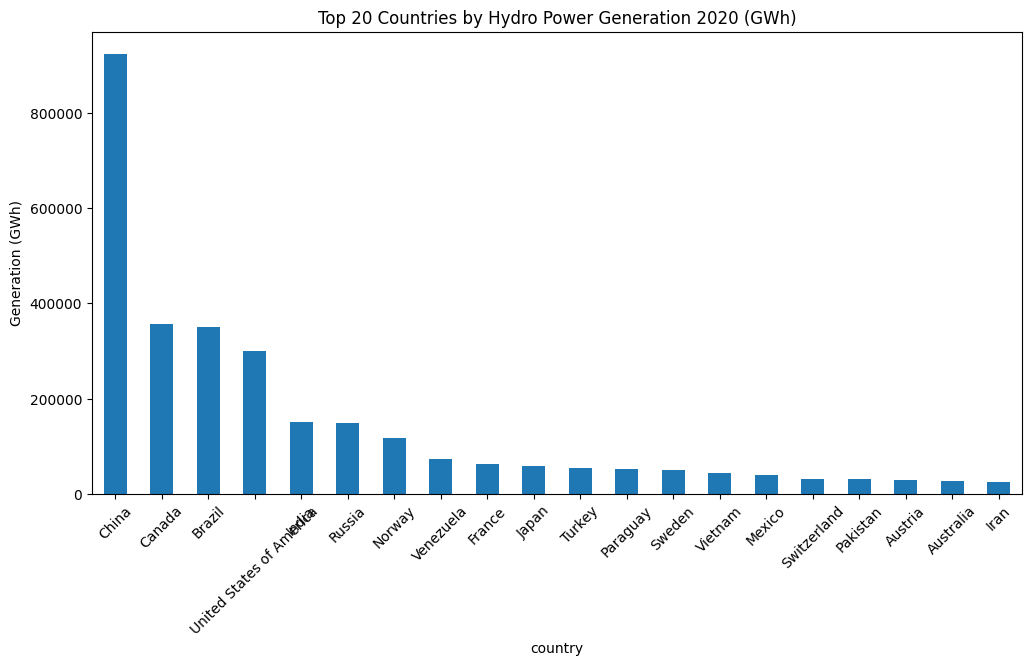

In [18]:
# Hydro plants analysis
df_re_hydro = df_re[df_re['primary_fuel'] == 'Hydro']

# Map of hydro plants
fig = px.scatter_geo(df_re_hydro,
                    lat='latitude',
                    lon='longitude',
                    hover_name='name of powerplant',
                    size='capacity in MW',
                    title='Global Hydro Power Plants (Size = Capacity)')
fig.show()

# Top countries by hydro generation
plt.figure(figsize=(12,6))
df_re_hydro.groupby('country')['estimated_generation_gwh_2020'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.title('Top 20 Countries by Hydro Power Generation 2020 (GWh)')
plt.ylabel('Generation (GWh)')
plt.xticks(rotation=45)
plt.show()

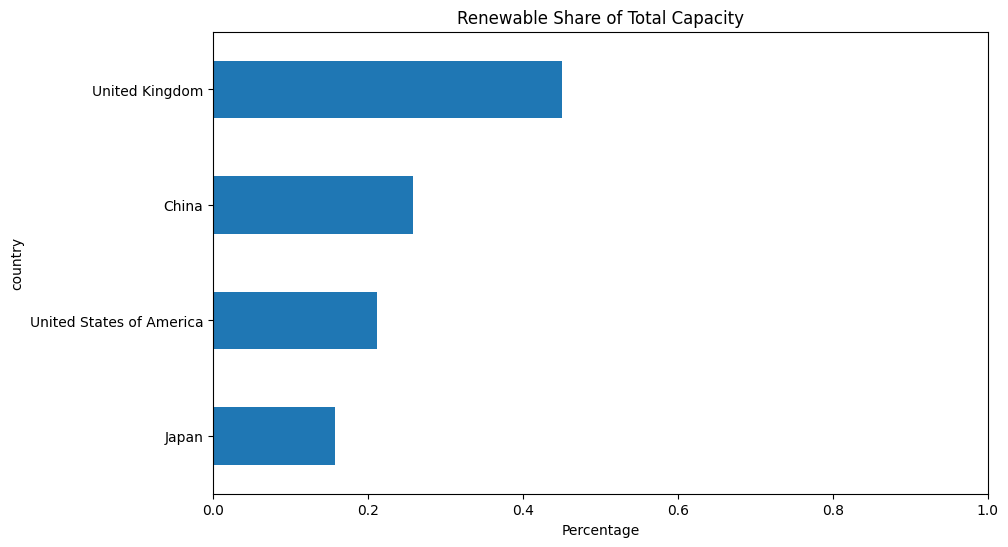

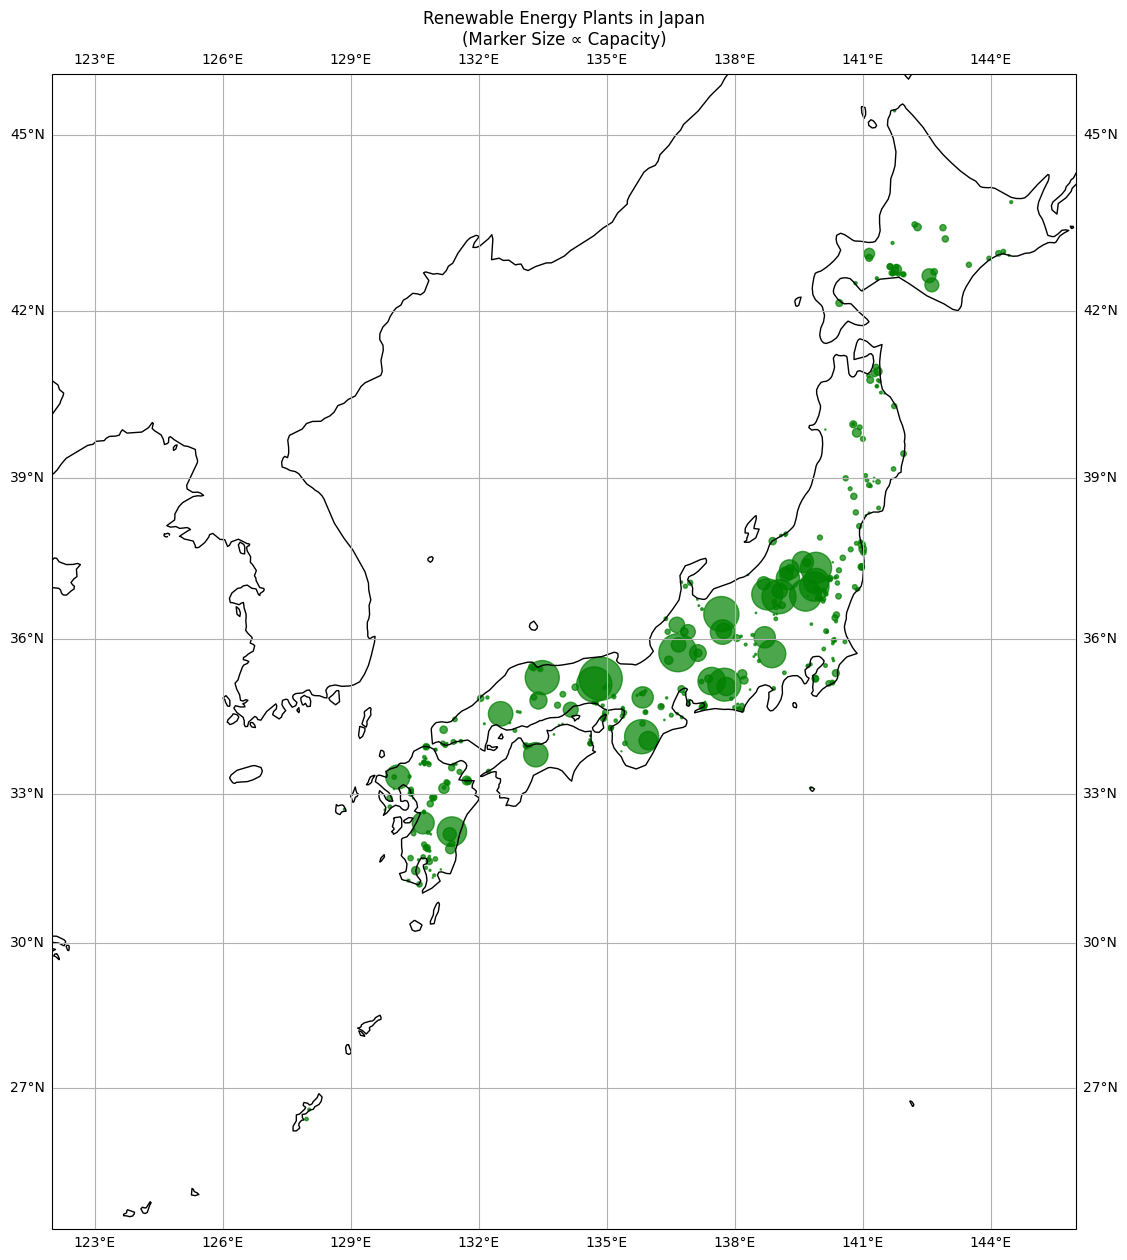

In [19]:
# Compare Japan with top renewable countries
countries = ["Japan", "United States of America", "China", "United Kingdom"]
df_4country = df[df['country'].isin(countries)]
df_4country_re = df_4country[df_4country['primary_fuel'].isin(renewable_sources)]

# Renewable share of capacity
df_compare = pd.DataFrame({
    'Renewable Capacity': df_4country_re.groupby('country')['capacity in MW'].sum(),
    'Total Capacity': df_4country.groupby('country')['capacity in MW'].sum()
})
df_compare['Renewable Share'] = df_compare['Renewable Capacity'] / df_compare['Total Capacity']

plt.figure(figsize=(10,6))
df_compare['Renewable Share'].sort_values().plot.barh()
plt.title('Renewable Share of Total Capacity')
plt.xlabel('Percentage')
plt.xlim(0, 1)
plt.show()

# Japan renewable plants map
df_re_japan = df_re[df_re['country'] == 'Japan']

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=140.0))
ax.set_extent([122, 146, 24, 46], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot plants with size proportional to capacity
sc = ax.scatter(df_re_japan["longitude"],
               df_re_japan["latitude"],
               c='green',
               s=df_re_japan["capacity in MW"]/2,  # Scale marker size
               transform=ccrs.PlateCarree(),
               alpha=0.7)

plt.title('Renewable Energy Plants in Japan\n(Marker Size ∝ Capacity)')
plt.show()